# PrecisionFDA Brain Cancer Predictive Modeling and Biomarker Discovery Challenge

# Feature Selection For SubChallenge 2

## Import necessary packages and change directory to file location

In [1]:
!cd /home/kamil.kural/FdaPrecision Challenge

/usr/bin/sh: line 0: cd: /home/kamil.kural/FdaPrecision: No such file or directory


In [2]:
import numpy as np
import pandas as pd
import os
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15
from collections import defaultdict
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import eli5
import shap
from IPython.display import HTML
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from typing import List

import os
import time
import datetime
import json
import gc
from numba import jit

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn import metrics
from typing import Any
from itertools import product
pd.set_option('max_rows', 500)
import re
from tqdm import tqdm
from joblib import Parallel, delayed

Using TensorFlow backend.


In [3]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
import torch 
import fastai
import bayes_opt
import xgboost
import lightgbm

## Read necessary Files into dataframes, merge and do data cleaning and scaling

In [5]:
df1=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc2_Phase1_CN_FeatureMatrix.tsv', sep='\t')

In [6]:
df2=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc2_Phase1_CN_Outcome.tsv', sep='\t')

In [7]:
df3=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc2_Phase1_CN_Phenotype.tsv', sep='\t')

In [8]:
df = pd.merge(df2,
                    df1,
                    left_index=True,
                    right_index=True)
df = pd.merge(df,
                    df3,
                    left_index=True,
                    right_index=True)

In [9]:
df=df.drop(['PATIENTID','PATIENTID_x','PATIENTID_y'], axis=1)

In [10]:
categorical_list = []
numerical_list = []
for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 4
Number of numerical features: 812


In [11]:
categorical_list

['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']

In [12]:
X = df.drop(['SURVIVAL_STATUS'], axis=1)
y = df.SURVIVAL_STATUS
feature_name = X.columns.tolist()

In [13]:
X = pd.get_dummies(X, drop_first=True)

## First Feature Selection Method which consists of statistical checks, correlation between features, chi-square analysis, Recursive Feature Elimination using Logistic Regression and Embedded Feature Selection methods using Random Forest, LR and Light Gradient Boosting


### Each Feature is being checked for the implemented test and receives a True or False based on satisfied criteria. These values are then added together. The best features are selected based on how many criteria they have satisfied.

In [14]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-200:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [15]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

200 selected features


In [16]:
cor_feature

['1p35.2',
 '10q26.12',
 '1p32.1',
 '3q21.3',
 '9q21.13',
 '18q22.2',
 '15q25.2',
 '1p34.3',
 '6q11.1',
 '4q22.3',
 '3p11.2',
 '10p12.2',
 '21q22.13',
 'CANCER_TYPE_MIXED',
 '12q13.3',
 '14q21.2',
 '14q32.2',
 '4q13.3',
 '9p13.3',
 '9q33.1',
 '5q13.3',
 '6p24.3',
 '1p21.2',
 '3q25.32',
 '7q11.1',
 '18p11.32',
 '12p13.33',
 '10q24.32',
 '5q14.2',
 '1q21.2',
 '12q21.1',
 '1p31.2',
 '2q36.2',
 '2p15',
 '18q22.1',
 '3q26.33',
 '18q21.32',
 '7q33',
 '13q21.33',
 '9q21.2',
 '9p21.2',
 '14q32.11',
 '16p12.2',
 '21p11.1',
 '4p15.1',
 '9q34.13',
 '9q22.2',
 '5q33.3',
 '14q21.3',
 '7p21.2',
 '7q21.3',
 '6q15',
 '6q22.2',
 '9q22.33',
 '1p32.3',
 '7q22.1',
 '17q11.1',
 '16p12.1',
 '16p12.3',
 '9q13',
 '7q31.31',
 '15q23',
 '7q21.11',
 '10q24.2',
 '7q35',
 '16p13.2',
 '9q22.32',
 '16q12.2',
 '14q32.32',
 '9q31.1',
 '8q24.23',
 '9q34.3',
 '18q21.2',
 '3q11.2',
 '4q33',
 '7p21.3',
 '3q26.2',
 '17q24.1',
 '7p22.2',
 '16p13.3',
 '1p35.1',
 '16q24.3',
 '8q21.12',
 '2p23.2',
 '9q21.31',
 '1p34.2',
 '4q21.21',
 '8q12.3',
 '14q32.31',
 '9q21.32',
 '18q11.2',
 '5p14.2',
 '5q11.1',
 '20p11.22',
 '7q21.13',
 '7q31.32',
 '19q13.13',
 '14q22.3',
 '15q21.3',
 '17q11.2',
 '1p32.2',
 '16q24.2',
 '17q23.3',
 '14q22.2',
 '21q11.2',
 '9p13.1',
 '8q22.3',
 'CANCER_TYPE_UNKNOWN',
 '5q21.3',
 '8q22.1',
 '3p11.1',
 '7q36.1',
 '5p14.1',
 '7q36.2',
 '8q21.11',
 '9q31.3',
 '3q25.33',
 '13q21.32',
 '7q36.3',
 '7q32.1',
 '12q24.11',
 '4p16.2',
 '1p31.3',
 '11p15.4',
 '5q31.2',
 '9p21.1',
 '21q21.1',
 '7p21.1',
 '19q13.42',
 '9q33.3',
 '8q13.2',
 '20q11.21',
 '7p11.1',
 '3p12.2',
 '16q12.1',
 '9q22.1',
 '10p11.1',
 '10q11.1',
 '17q23.1',
 '7q32.2',
 '9p22.1',
 '2p25.3',
 '17p13.2',
 '19q13.41',
 '19q13.11',
 '5q33.2',
 '7p14.2',
 '7q32.3',
 '8q22.2',
 '22q13.33',
 '10p15.3',
 '7q11.22',
 '9q31.2',
 '7q31.2',
 '7p13',
 '7q11.23',
 '9q33.2',
 '8q24.11',
 '8q13.3',
 '7p14.1',
 '9p23',
 '5p15.32',
 '7p15.2',
 '8q24.22',
 '8q12.1',
 '9p22.2',
 '8q21.13',
 '7p12.3',
 '9p22.3',
 '8q23.3',
 '5q21.2',
 '7p14.3',
 '14q32.33',
 '10q11.23',
 '8q11.23',
 '8q24.12',
 '8q23.2',
 '8q24.3',
 '7q31.1',
 '7p15.1',
 '2p13.2',
 '7p12.1',
 '8q21.3',
 '10q23.32',
 '8q11.22',
 '8q23.1',
 '7p15.3',
 '3q13.12',
 '9p24.2',
 'SEX_FEMALE',
 '8q24.21',
 '7p11.2',
 '9p12',
 '8q24.13',
 '21q11.1',
 '9p24.3',
 '9p24.1',
 '9p21.3',
 'RACE_WHITE',
 'CANCER_TYPE_GBM']

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=200)
chi_selector.fit(X_norm, y)

SelectKBest(k=200, score_func=<function chi2 at 0x7f1937b6e440>)

In [18]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

200 selected features


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(n_jobs=60), n_features_to_select=200, step=1000, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 822 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=60, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=200, step=1000, verbose=5)

In [20]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

200 selected features


In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '15*median',max_features=200)
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=200, norm_order=1, prefit=False,
                threshold='15*median')

In [22]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

200 selected features


In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=1000),max_features=200)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
 

In [24]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

200 selected features


In [25]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.0001, min_child_weight=0.0001)

embeded_lgb_selector = SelectFromModel(lgbc,max_features=200)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=0.0001,
                                         min_split_gain=0.0001,
                                         n_estimators=500, n_jobs=-1,
                                         num_leaves=32, objective=None,
                                         random_state=None, reg_alpha=3,
                                         reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
              

In [26]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

125 selected features


In [27]:
pd.set_option('display.max_rows', None)
# put all selection together
k={'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support}
feature_selection_df = pd.DataFrame.from_dict(k, orient='index')
feature_selection_df=feature_selection_df.transpose()
# # count the selected times for each feature
feature_selection_df[["Pearson", "Chi-2","RFE", "Logistics", "Random Forest", "LightGBM"]] *= 1
def f(x):    
    return x[1] + x[2] + x[3] + x[4] + x[5] + x[6]
feature_selection_df['Total']= feature_selection_df.apply(f, axis=1)
# # display the top 200
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df2=feature_selection_df[['Feature','Total']]
feature_selection_df2.head()

,Feature,Total
1,9q33.2,6.0
2,9q31.3,6.0
3,9p24.1,6.0
4,9p21.3,6.0
5,8q24.21,6.0


In [28]:
feature_selection_df2.to_csv('SubChallenge2_Feature_list')

In [29]:
feature_selection_df2=feature_selection_df2.values.tolist()

In [30]:
categorical_feats=['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']
for f_ in categorical_feats:
    df[f_], _ = pd.factorize(df[f_])
    # Set feature type as categorical
    df[f_] = df[f_].astype('category')

In [31]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]

# features = [f for f in data.columns if f not in ['SK_ID_CURR', 'TARGET']]
# score_feature_selection(df=data[features], train_features=features, target=data['TARGET'])

for threshold in [0, 1, 2, 3, 4, 5, 6]:
    features = [_f for _f, _Total, in feature_selection_df2 if _Total >= threshold]
    split_cat_feats = [_f for _f, _Total, in feature_selection_df2 if (_Total >= threshold) & (_f in categorical_feats)]
    
                                                                                             
    print('Results for threshold %3d' % threshold)
    split_results = score_feature_selection(df, train_features=features, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    

Results for threshold   0
	 SPLIT : 0.709725 +/- 0.112328
Results for threshold   1
	 SPLIT : 0.702143 +/- 0.155526
Results for threshold   2
	 SPLIT : 0.724615 +/- 0.120209
Results for threshold   3
	 SPLIT : 0.769396 +/- 0.103079
Results for threshold   4
	 SPLIT : 0.804231 +/- 0.112074
Results for threshold   5
	 SPLIT : 0.803132 +/- 0.089991
Results for threshold   6
	 SPLIT : 0.739945 +/- 0.129760


In [32]:
feature_selection_df.head(72)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,9q33.2,1,1,1,1,1,1,6.0
2,9q31.3,1,1,1,1,1,1,6.0
3,9p24.1,1,1,1,1,1,1,6.0
4,9p21.3,1,1,1,1,1,1,6.0
5,8q24.21,1,1,1,1,1,1,6.0
6,8q21.3,1,1,1,1,1,1,6.0
7,7q31.1,1,1,1,1,1,1,6.0
8,5q31.2,1,1,1,1,1,1,6.0
9,2p25.3,1,1,1,1,1,1,6.0
10,21q11.1,1,1,1,1,1,1,6.0


In [56]:
categorical_feats=['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']
for f_ in categorical_feats:
    df[f_], _ = pd.factorize(df[f_])
    # Set feature type as categorical
    df[f_] = df[f_].astype('category')

In [57]:
def get_feature_importances(data, shuffle, seed=None):
    # Gather real features
    train_features = [x for x in df.columns if x not in ['SURVIVAL_STATUS']]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = df['SURVIVAL_STATUS'].copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = df['SURVIVAL_STATUS'].copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data[train_features], y, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 25,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 60
        #num_leaves= 26, feature_fraction= 0.4, learning_rate= 0.01, bagging_fraction= 1, max_depth= 25,scale_pos_weight=0.5, min_child_weight= 1, n_estimators= 200, lambda_l1= 1, lambda_l2= 2, min_split_gain=0.01, n_jobs= 20, verbose=1
    }
    
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200,categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(data[train_features]))
    
    return imp_df

In [58]:
from sklearn.metrics import roc_auc_score
# Seed the unexpected randomness of this world
np.random.seed(123)
# Get the actual importance, i.e. without shuffling
actual_imp_df2 = get_feature_importances(data=df, shuffle=False)

In [59]:
actual_imp_df2.head()

,feature,importance_gain,importance_split,trn_score
0,1p36.33,0.000000000000000,0,0.943990768684538
1,1p36.32,0.000000000000000,0,0.943990768684538
2,1p36.31,12.711599826812744,2,0.943990768684538
3,1p36.23,0.676820993423462,1,0.943990768684538
4,1p36.22,0.000000000000000,0,0.943990768684538


In [60]:
null_imp_df = pd.DataFrame()
nb_runs = 100
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_feature_importances(data=df, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

Done with  100 of  100 (Spent   0.7 min)

In [62]:
null_imp_df.to_csv('null_importances_distribution_rf2.csv')
actual_imp_df2.to_csv('actual_importances_ditribution_rf2.csv')

In [63]:
null_imp_df=pd.read_csv('null_importances_distribution_rf2.csv')
actual_imp_df2=pd.read_csv('actual_importances_ditribution_rf2.csv')

In [64]:
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df2_.loc[actual_imp_df2_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df2_.loc[actual_imp_df2_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())
        

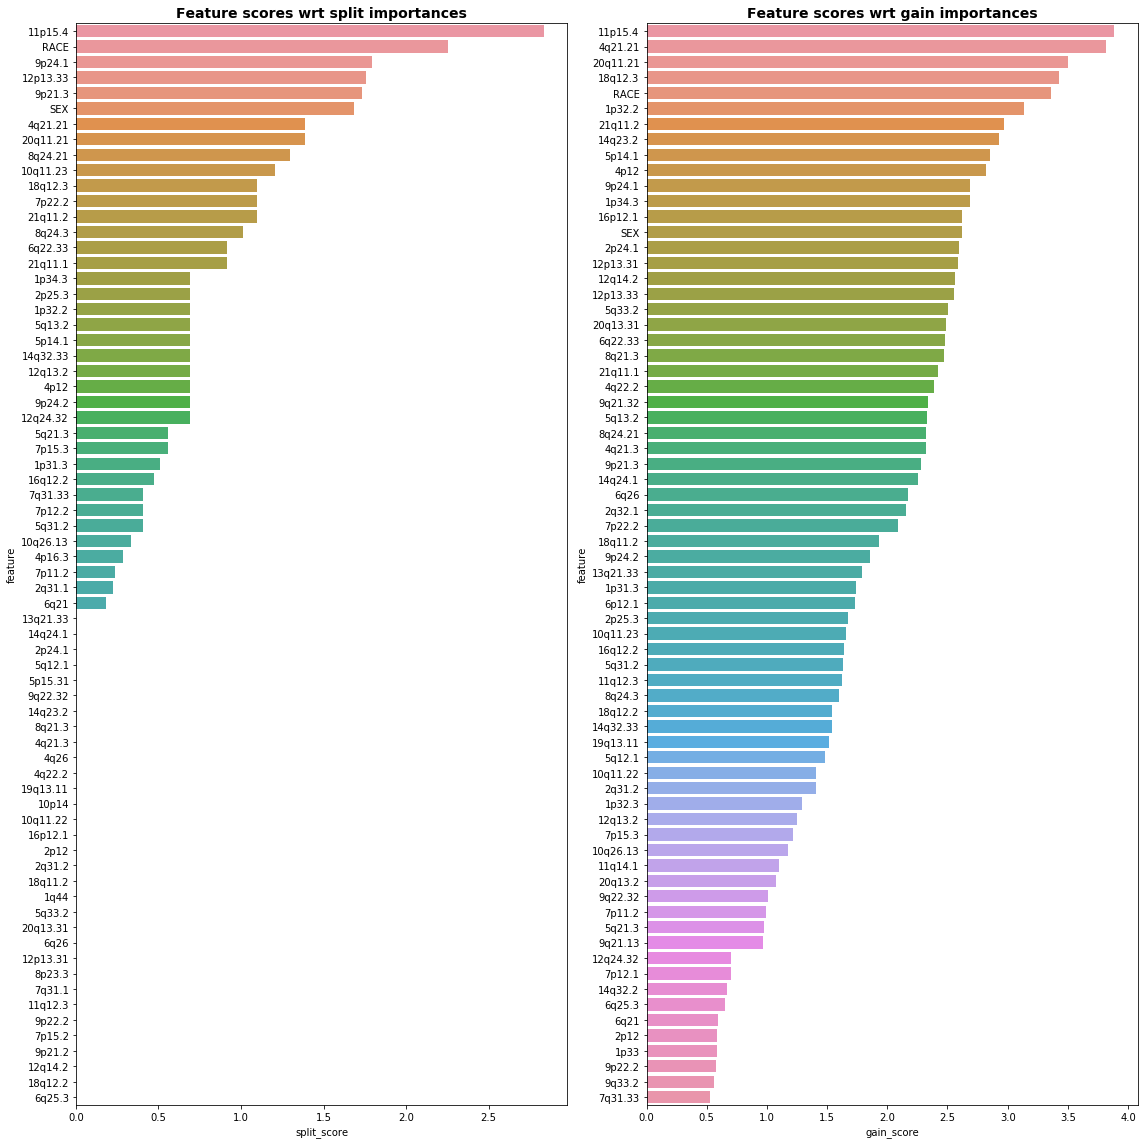

In [66]:
import matplotlib.gridspec as gridspec
feature_scores = []
for _f in actual_imp_df2['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = actual_imp_df2.loc[actual_imp_df2['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = actual_imp_df2.loc[actual_imp_df2['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))

scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

In [67]:
feature_score_precision = pd.DataFrame(feature_scores)
feature_score_precision.to_csv('feature_scores_rf2.csv')

In [69]:
correlation_scores = []
for _f in actual_imp_df2['feature'].unique():
    f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps = actual_imp_df2.loc[actual_imp_df2['feature'] == _f, 'importance_gain'].values
    gain_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
    f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps = actual_imp_df2.loc[actual_imp_df2['feature'] == _f, 'importance_split'].values
    split_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
    correlation_scores.append((_f, split_score, gain_score))

corr_scores_df = pd.DataFrame(correlation_scores, columns=['feature', 'split_score', 'gain_score'])

In [70]:
corr_scores_df.to_csv('correlation_scores_rf2.csv')

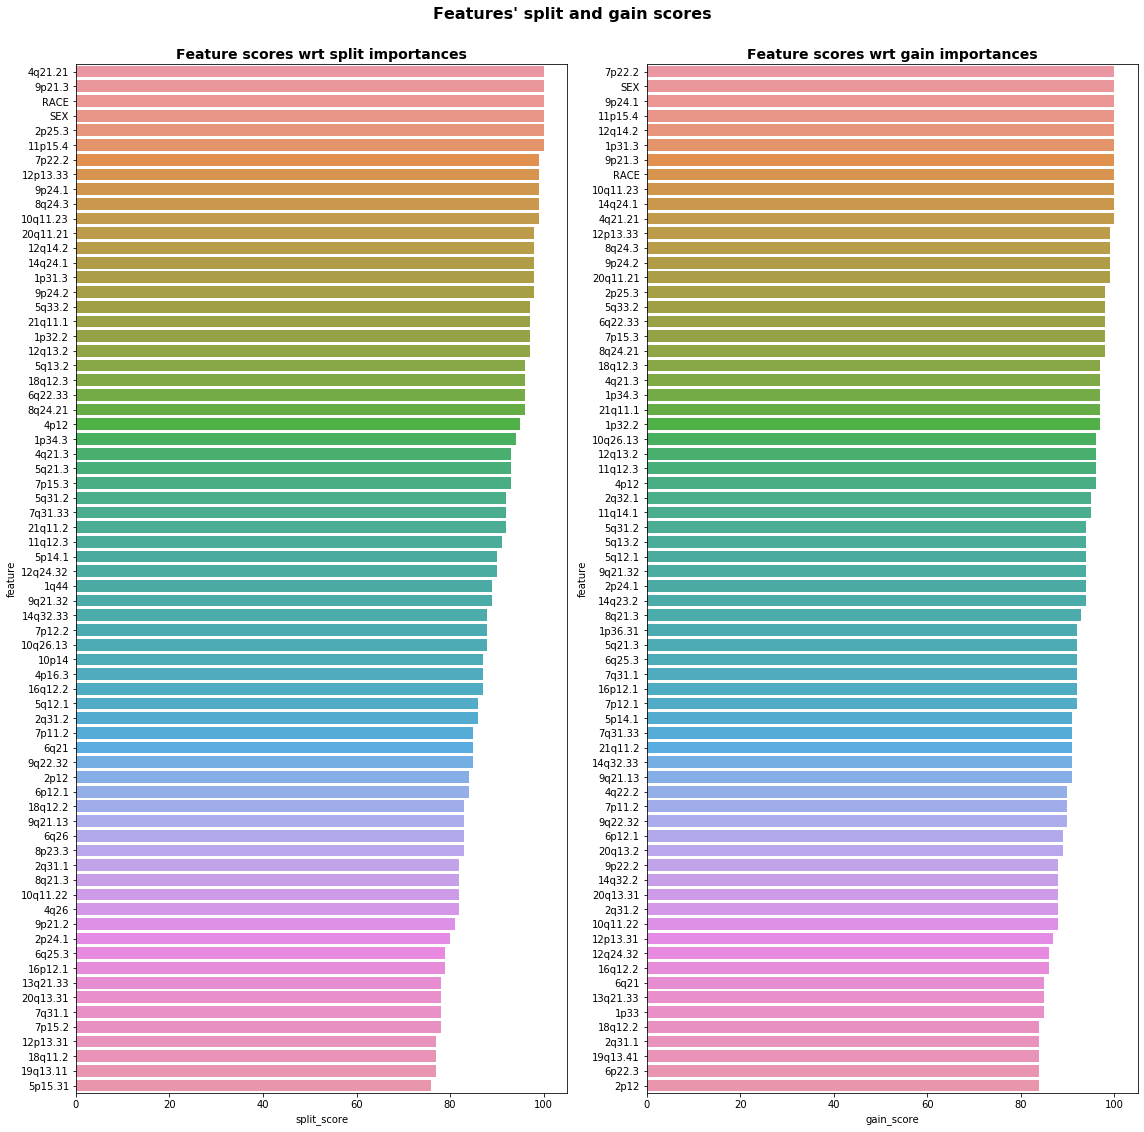

In [71]:
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=corr_scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=corr_scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.suptitle("Features' split and gain scores", fontweight='bold', fontsize=16)
fig.subplots_adjust(top=0.93)

In [89]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]

# features = [f for f in data.columns if f not in ['SK_ID_CURR', 'TARGET']]
# score_feature_selection(df=data[features], train_features=features, target=data['TARGET'])

for threshold in [0, 10, 20, 30 , 40, 50 ,60 , 70, 80 , 90, 95, 99, 99.5, 99.9]:
    split_feats = [_f for _f, _score, _ in correlation_scores if _score >= threshold]
    split_cat_feats = [_f for _f, _score, _ in correlation_scores if (_score >= threshold) & (_f in categorical_feats)]
    gain_feats = [_f for _f, _, _score in correlation_scores if _score >= threshold]
    gain_cat_feats = [_f for _f, _, _score in correlation_scores if (_score >= threshold) & (_f in categorical_feats)]
                                                                                             
    print('Results for threshold %3d' % threshold)
    split_results = score_feature_selection(df, train_features=split_feats, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    gain_results = score_feature_selection(df, train_features=gain_feats, cat_feats=gain_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t GAIN  : %.6f +/- %.6f' % (gain_results[0], gain_results[1]))

Results for threshold   0
	 SPLIT : 0.714780 +/- 0.142266
	 GAIN  : 0.714780 +/- 0.142266
Results for threshold  10
	 SPLIT : 0.747253 +/- 0.140660
	 GAIN  : 0.745989 +/- 0.116370
Results for threshold  20
	 SPLIT : 0.741593 +/- 0.141182
	 GAIN  : 0.750330 +/- 0.135902
Results for threshold  30
	 SPLIT : 0.771209 +/- 0.127022
	 GAIN  : 0.763516 +/- 0.112867
Results for threshold  40
	 SPLIT : 0.791758 +/- 0.114660
	 GAIN  : 0.757088 +/- 0.115467
Results for threshold  50
	 SPLIT : 0.777527 +/- 0.117158
	 GAIN  : 0.772363 +/- 0.110989
Results for threshold  60
	 SPLIT : 0.777253 +/- 0.139401
	 GAIN  : 0.753571 +/- 0.143805
Results for threshold  70
	 SPLIT : 0.786236 +/- 0.153918
	 GAIN  : 0.781703 +/- 0.115587
Results for threshold  80
	 SPLIT : 0.788874 +/- 0.135090
	 GAIN  : 0.810165 +/- 0.139294
Results for threshold  90
	 SPLIT : 0.856099 +/- 0.131079
	 GAIN  : 0.819176 +/- 0.142022
Results for threshold  95
	 SPLIT : 0.857692 +/- 0.123605
	 GAIN  : 0.858736 +/- 0.110015
Results fo

In [90]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]


for threshold in [-23, -2, -1, -0.5, 0, 0.5, 1, 1.3, 1.5, 2, 2.5, 2.6, 2.9, 3, 3.5]:
    split_feats = [_f for _f, _score, _ in feature_scores if _score >= threshold]
    split_cat_feats = [_f for _f, _score, _ in feature_scores if (_score >= threshold) & (_f in categorical_feats)]
    gain_feats = [_f for _f, _, _score in feature_scores if _score >= threshold]
    gain_cat_feats = [_f for _f, _, _score in feature_scores if (_score >= threshold) & (_f in categorical_feats)]
                                                                                             
    print('Results for threshold %3f' % threshold)
    split_results = score_feature_selection(df, train_features=split_feats, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    gain_results = score_feature_selection(df, train_features=gain_feats, cat_feats=gain_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t GAIN  : %.6f +/- %.6f' % (gain_results[0], gain_results[1]))

Results for threshold -23.000000
	 SPLIT : 0.745989 +/- 0.116370
	 GAIN  : 0.745989 +/- 0.116370
Results for threshold -2.000000
	 SPLIT : 0.741154 +/- 0.163025
	 GAIN  : 0.748352 +/- 0.144649
Results for threshold -1.000000
	 SPLIT : 0.773681 +/- 0.128877
	 GAIN  : 0.762143 +/- 0.134294
Results for threshold -0.500000
	 SPLIT : 0.793159 +/- 0.106347
	 GAIN  : 0.779066 +/- 0.139260
Results for threshold 0.000000
	 SPLIT : 0.802720 +/- 0.157261
	 GAIN  : 0.790495 +/- 0.120733
Results for threshold 0.500000
	 SPLIT : 0.869451 +/- 0.114136
	 GAIN  : 0.805879 +/- 0.139978
Results for threshold 1.000000
	 SPLIT : 0.862555 +/- 0.086911
	 GAIN  : 0.830989 +/- 0.146980
Results for threshold 1.300000
	 SPLIT : 0.836648 +/- 0.130170
	 GAIN  : 0.857033 +/- 0.094882
Results for threshold 1.500000
	 SPLIT : 0.800357 +/- 0.150460
	 GAIN  : 0.864670 +/- 0.114483
Results for threshold 2.000000
	 SPLIT : 0.737720 +/- 0.113536
	 GAIN  : 0.838846 +/- 0.113725
Results for threshold 2.500000
	 SPLIT : 0.66

For this challenge, the best choice seems to be picking a threshold with 1 for Split scores. Again, we try to achieve the highest score with the least amount of features
The resulting chromosomal locations are : 
11p15.4
RACE
9p24.1
12p13.33
9p21.3
SEX
4q21.21
20q11.21